In [ ]:
# Load required libraries
from cerebralcortex.core.data_manager.raw.stream_handler import DataSet
from cerebralcortex.cerebralcortex import CerebralCortex
from cerebralcortex.core.datatypes.datastream import DataStream
from cerebralcortex.core.datatypes.datastream import DataPoint
import matplotlib.pyplot as plt

In [10]:
# Load CerebralCortex Configurations
CC = CerebralCortex("../cc_config_file/cc_vagrant_configuration.yml")

In [11]:
# Get all users for study name "Demo"
user_ids = CC.get_all_users("demo")

# Print only first user's identifier
print("Owner ID: {}".format(user_ids[0]["identifier"]))

Owner ID: 636fcc1f-8966-4e63-a9df-0cbaa6e9296c


In [12]:
# Get all the streams of a user
user_streams = CC.get_user_streams(user_ids[0]["identifier"])

# Print all the stream names and identifiers
for key,val in user_streams.items():
    print("{} = {}, {}\n".format(key, val["name"], val["identifier"]))


DATA_QUALITY_SUMMARY_HOUR--LED--org.md2k.motionsense--MOTION_SENSE_HRV--RIGHT_WRIST = DATA_QUALITY_SUMMARY_HOUR--LED--org.md2k.motionsense--MOTION_SENSE_HRV--RIGHT_WRIST, 6af77114-d438-3a9c-8c9c-fd3489ed04f7

DATA_QUALITY_SUMMARY_MINUTE--LED--org.md2k.motionsense--MOTION_SENSE_HRV--LEFT_WRIST = DATA_QUALITY_SUMMARY_MINUTE--LED--org.md2k.motionsense--MOTION_SENSE_HRV--LEFT_WRIST, 045b4cd0-1104-39b6-8c32-ae82b8cdc89d

CU_APPUSAGE--edu.dartmouth.eureka = CU_APPUSAGE--edu.dartmouth.eureka, 560ec2a2-edb4-35b2-b27c-9af560545c3c

DATA_QUALITY_SUMMARY_HOUR--ECG--org.md2k.autosenseble--AUTOSENSE_BLE--CHEST = DATA_QUALITY_SUMMARY_HOUR--ECG--org.md2k.autosenseble--AUTOSENSE_BLE--CHEST, e68f06d5-ed76-38ca-b0a8-f85e89f43d2d

GYROSCOPE--org.md2k.motionsense--MOTION_SENSE_HRV--LEFT_WRIST = GYROSCOPE--org.md2k.motionsense--MOTION_SENSE_HRV--LEFT_WRIST, ee0a3aac-699a-3491-9010-ed37e94b1032

DATA_QUALITY_SUMMARY_HOUR--ACCELEROMETER--org.md2k.autosenseble--AUTOSENSE_BLE--CHEST = DATA_QUALITY_SUMMARY_HOUR

/opt/conda/lib/python3.6/site-packages/MD2K_Cerebral_Cortex-2.2.2-py3.6.egg/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)


In [20]:
# Get stream (BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE) days when data is available
stream_days = CC.get_stream_days("d744222a-43ed-31e6-96cc-d8e44969bed0")

# Print stream (BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE) days
print("Stream Days {}".format(stream_days))

Stream Days []


In [28]:
# Get data stream of a user for a particular day
# stream name BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE
ds = CC.get_stream("d744222a-43ed-31e6-96cc-d8e44969bed0", "636fcc1f-8966-4e63-a9df-0cbaa6e9296c", "20171201")

# Print data stream's data descriptor
print("Stream Data Descriptor" ,ds.data_descriptor)

# Please have a look at all the properties of data stream at: https://github.com/MD2Korg/CerebralCortex/blob/master/cerebralcortex/core/datatypes/datastream.py

Stream Data Descriptor [{'NAME': 'Level', 'UNIT': 'percentage', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '100', 'MIN_VALUE': '0', 'DESCRIPTION': 'current battery charge'}, {'NAME': 'Voltage', 'UNIT': 'voltage', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '5000', 'MIN_VALUE': '0', 'DESCRIPTION': 'current battery voltage level'}, {'NAME': 'Temperature', 'UNIT': 'celsius', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '100', 'MIN_VALUE': '-50', 'DESCRIPTION': 'current battery temperature'}]


In [31]:
# Print only only first 5 data points of a stream
ds.data[:5]

[DataPoint(2017-12-01 04:59:42.791000+00:00, None, -21600000, [15.000000953674316, 3699.0, 211.0]),
 DataPoint(2017-12-01 05:03:44.903000+00:00, None, -21600000, [15.000000953674316, 3688.0, 215.0]),
 DataPoint(2017-12-01 05:03:45.905000+00:00, None, -21600000, [15.000000953674316, 3688.0, 215.0]),
 DataPoint(2017-12-01 05:03:46.906000+00:00, None, -21600000, [15.000000953674316, 3688.0, 215.0]),
 DataPoint(2017-12-01 05:03:47.907000+00:00, None, -21600000, [15.000000953674316, 3688.0, 215.0])]

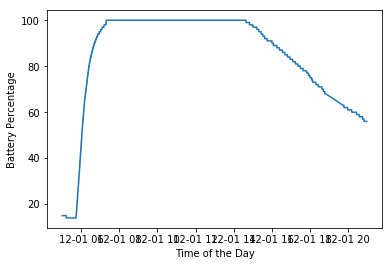

In [40]:
# Plot data stream

battery = []
day_time = []
for dp in ds.data:
    battery.append(dp.sample[0])
    day_time.append(dp.start_time)

plt.plot(day_time,battery)
plt.ylabel('Battery Percentage')
plt.xlabel('Time of the Day')
plt.show()    